# Txy et Pxy pour le mélange 2-propanol/eau



In [104]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fsolve
import thermo as th

## Dans cette première partie on définit toutes les fonctions qui seront utilisées, pour la pression de vapeur on utilise la fonction Antoine de thermo, ensuite on définit les équations du modèle de Wilson.

In [105]:
def PsatA(T):
    return th.vapor_pressure.Antoine(T,16.678,3640.2,-53.54,np.exp(1))
#    c=th.Chemical('2-propanol')
#    return c.VaporPressure.T_dependent_property(T)/1000
def PsatB(T):
    return th.vapor_pressure.Antoine(T,16.2887,3816.44,-46.13,np.exp(1))
#    c=th.Chemical('water')
#    return c.VaporPressure.T_dependent_property(T)/1000
def Tboil(Psat,P):
    return fsolve(lambda T: Psat(T) - P,300)
def gamma_1(x1):    
    lamb12=(V_2/V_1)*np.exp((-1*a_12)/(R*T))
    lamb21=(V_1/V_2)*np.exp((-1*a_21)/(R*T))
    x2=1-x1
    t1=-1*np.log(x1+lamb12*x2)
    t2=lamb12/(x1+lamb12*x2)
    t3=lamb21/(x2+lamb21*x1)
    ans=t1+x2*(t2-t3)
    return np.exp(ans)

def gamma_2(x2):
    lamb12=(V_2/V_1)*np.exp((-1*a_12)/(R*T))
    lamb21=(V_1/V_2)*np.exp((-1*a_21)/(R*T))
    x1=1-x2
    t1=-1*np.log(x2+lamb21*x1)
    t2=lamb12/(x1+lamb12*x2)
    t3=lamb21/(x2+lamb21*x1)
    ans=t1-x1*(t2-t3)
    return np.exp(ans)

def gamma_1_T(x1,Temp):    
    lamb12=(V_2/V_1)*np.exp((-1*a_12)/(R*Temp))
    lamb21=(V_1/V_2)*np.exp((-1*a_21)/(R*Temp))
    x2=1-x1
    t1=-1*np.log(x1+lamb12*x2)
    t2=lamb12/(x1+lamb12*x2)
    t3=lamb21/(x2+lamb21*x1)
    ans=t1+x2*(t2-t3)
    return np.exp(ans)

def gamma_2_T(x2,Temp):
    lamb12=(V_2/V_1)*np.exp((-1*a_12)/(R*Temp))
    lamb21=(V_1/V_2)*np.exp((-1*a_21)/(R*Temp))
    x1=1-x2
    t1=-1*np.log(x2+lamb21*x1)
    t2=lamb12/(x1+lamb12*x2)
    t3=lamb21/(x2+lamb21*x1)
    ans=t1-x1*(t2-t3)
    return np.exp(ans)

def P(x1):
    x2=1-x1
    return x1*gamma_1(x1)*Psat_1+x2*gamma_2(x2)*Psat_2

def y(x1):
    return (x1*Psat_1*gamma_1(x1))/P(x1)

def y_1(T):
    return x_1*PsatA(T)*gamma_1_T(x_1,T)/PP

A = '2-propanol'
B = 'eau'
R=1.987
T=353.15
a_12=437.98
a_21=1238
V_1=76.92
V_2=18.07

## Tracer Pxy 


Calcul typique de 2 substances en équilibre liquide-vapeur, on commence en posant les équations d'Antoine de la pression de vapeur pour les deux composés, on trouve ces coefficients dans la littérature, ici en kPa.

In [106]:
Psat_1= PsatA(T)
Psat_2= PsatB(T)
print ("Psat_2propanol=",Psat_1)
print ("Psat_eau=",Psat_2)

Psat_2propanol= 92.5922335187
Psat_eau= 47.3756867345


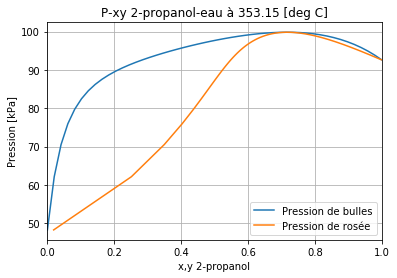

In [107]:
x_1 = np.linspace(0.001,0.999)

plt.plot(x_1, P(x_1),y(x_1),P(x_1))   # pour chaque composition x et y, trouver la valeur de la pression de rosée et de bulles
plt.title('P-xy {:s}-{:s} à {:.2f} [deg C]'.format(A,B,T))
plt.legend(['Pression de bulles','Pression de rosée'],loc='best')
plt.ylabel('Pression [kPa]')
plt.xlabel('x,y {:s}'.format(A))
plt.xlim(0,1)
plt.grid();

## Tracer  Txy , ici on aura besoin de solutionner une équation non-linéaire pour trouver T. On utilise la fonction de recherche de zéros de numpy, fsolve qui recherche la racine en donnant un estimé de départ raisonnable.

In [108]:
PP = 101.325 # kPa
print ("Point d'ébullition normal du {:s} est {:.4f} deg C".format(A,Tboil(PsatA,PP)[0]))    # le [0] parce qu'il pourrait y avoir plusieurs racines
print ("Point d'ébullition normal de l'{:s} est {:.4f} deg C".format(B,Tboil(PsatB,PP)[0]))  # donc fsolve retourne un vecteur plutot qu'une seule valeur

Point d'ébullition normal du 2-propanol est 355.3891 deg C
Point d'ébullition normal de l'eau est 373.1497 deg C


91.4689979621
98.5664741843
[ 0.44896835] [ 96.71321373]


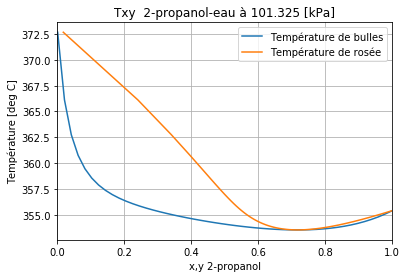

In [109]:
x_1 = np.linspace(0.001,0.999)
x_2 = 1-x_1

T=np.zeros(x_1.size)
for i in range(x_1.size):
    T[i]=fsolve(lambda T: (x_1[i]*gamma_1_T(x_1[i],T)*PsatA(T)+x_2[i]*gamma_2_T(x_2[i],T)*PsatB(T))-PP,300)
 
plt.plot(x_1,T,y_1(T),T)
plt.title('Txy  {:s}-{:s} à {:.3f} [kPa]'.format(A,B,PP))
plt.legend(['Température de bulles','Température de rosée'],loc='best')
plt.ylabel('Température [deg C]')
plt.xlabel('x,y {:s}'.format(A))
plt.xlim(0,1)
plt.grid();
#
# maintenant on peut utiliser les fonctions pour trouver les valeurs demandées, par exemple pour x1=0.85, et pour y1=0.6.
#
T=353.15
print(P(0.25))
print(P(0.85))
guess=0.5
x=fsolve(lambda x1: (x1*Psat_1*gamma_1(x1))/P(x1)-0.6,guess)
PP=P(x)
print(x,PP)
# ainsi de suite